In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
product = pd.read_csv('C:/Users/wjssm/Desktop/lpoint/data/01-2.Product.csv', dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",")

* CLNT_ID : 방문자의 랜덤으로 부여된 고유 ID. 브라우저 체제에 따라 다른 방문자로 인식. 동일고객이라도 여러개의 ID 보유
* SESS_ID : 세션이 시작될 때 부여된 고유 ID.
* HITS_SEQ : 화면 클릭, 이벤트 참여, 검색 등 방문자의 행위에 대해 순서대로 배열된 일련번호. 세션 내에서 발생되며 첫번째 행위에 대해서는 1로 설정됨.
* PD_C : 구매한 상품의 코드(최소단위)
* PD_ADD_NM : 구매한 상품의 추가 정보
* PD_BRA_NM	: 구매한 상품의 브랜드
* PD_BUY_AM : 구매한 상품 1개의 금액
* PD_BUY_CT : 구매한 상품의 수량

In [3]:
product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,07605037,12,642112,바비브라운,39000,1
1,4140076,10189797,13,570603,데상트,39000,2
2,4142395,06158159,85,179538,아베다,39000,1
3,4144914,07935714,12,554336,아디다스 키즈,39000,1
4,4144917,06406509,78,190306,데코르테,39000,5


In [4]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024906 entries, 0 to 5024905
Data columns (total 7 columns):
CLNT_ID      object
SESS_ID      object
HITS_SEQ     int64
PD_C         int64
PD_BRA_NM    object
PD_BUY_AM    int64
PD_BUY_CT    int64
dtypes: int64(4), object(3)
memory usage: 268.4+ MB


In [5]:
product.shape

(5024906, 7)

In [ ]:
product['CLNT_ID'].unique().sum()

In [6]:
master = pd.read_csv('C:/Users/wjssm/Desktop/lpoint/data/06.Master.csv',usecols=['PD_C','CLAC1_NM'])
master.head()

,PD_C,CLAC1_NM
0,64382,스포츠패션
1,62282,속옷/양말/홈웨어
2,61729,유아동의류
3,61537,패션잡화
4,58820,남성의류


In [6]:
master.shape

(847652, 2)

In [29]:
m1 = pd.merge(product,master,on=['PD_C'],how='left')
m1.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,CLAC1_NM
0,4139680,07605037,12,642112,바비브라운,39000,1,화장품/뷰티케어
1,4140076,10189797,13,570603,데상트,39000,2,스포츠패션
2,4142395,06158159,85,179538,아베다,39000,1,퍼스널케어
3,4144914,07935714,12,554336,아디다스 키즈,39000,1,유아동의류
4,4144917,06406509,78,190306,데코르테,39000,5,화장품/뷰티케어


In [31]:
m1.shape

(5024906, 8)

In [32]:
m1['CLAC1_NM'] = m1['CLAC1_NM'].astype('category')

In [10]:
#대분류 당 클라이언트 아이디 개수
m1[['CLAC1_NM','CLNT_ID']].groupby(['CLAC1_NM']).count()

,CLNT_ID
CLAC1_NM,
가구,43485
건강식품,123623
계절가전,13886
과일,25105
구기/필드스포츠,33899
남성의류,554910
냉동식품,13586
냉장/세탁가전,7524
냉장식품,13863


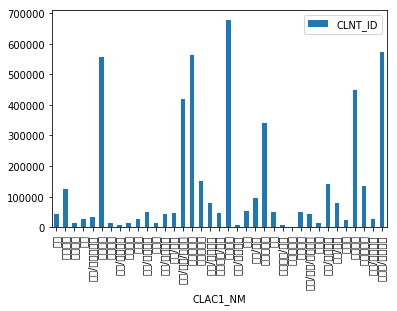

In [11]:
m1[['CLAC1_NM','CLNT_ID']].groupby(['CLAC1_NM']).count().plot.bar()

In [7]:
session = pd.read_csv('C:/Users/wjssm/Desktop/lpoint/data/05.Session.csv', dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",")
session.head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,5873599,08641867,9,20180509,82.0,1890.0,mobile,Daejeon,Daejeon
1,5873599,06616320,21,20180611,105.0,1604.0,mobile,Busan,Busan
2,5873599,05886172,40,20180624,41.0,632.0,mobile,Daejeon,Daejeon
3,5873884,01050889,15,20180913,160.0,1035.0,mobile,Gyeonggi-do,Anyang
4,5874461,10298270,5,20180412,13.0,298.0,mobile,Seoul,Seoul


In [8]:
session.shape

(2712907, 9)

In [9]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712907 entries, 0 to 2712906
Data columns (total 9 columns):
CLNT_ID            object
SESS_ID            object
SESS_SEQ           int64
SESS_DT            int64
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V      float64
DVC_CTG_NM         object
ZON_NM             object
CITY_NM            object
dtypes: float64(2), int64(2), object(5)
memory usage: 186.3+ MB


In [10]:
session['SESS_DT'] = pd.to_datetime(session['SESS_DT'], format="%Y%m%d")

In [11]:
session.isna().sum()

CLNT_ID                0
SESS_ID                0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
dtype: int64

In [38]:
m2 = pd.merge(m1, session, how='inner', on = ['CLNT_ID','SESS_ID'])
m2.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,CLAC1_NM,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,4139680,07605037,12,642112,바비브라운,39000,1,화장품/뷰티케어,1,2018-05-26,21.0,902.0,desktop,Seoul,Seoul
1,4139680,07605037,12,401577,바비브라운,39000,1,화장품/뷰티케어,1,2018-05-26,21.0,902.0,desktop,Seoul,Seoul
2,4139680,07605037,28,401577,바비브라운,39000,1,화장품/뷰티케어,1,2018-05-26,21.0,902.0,desktop,Seoul,Seoul
3,4139680,07605037,28,642112,바비브라운,39000,1,화장품/뷰티케어,1,2018-05-26,21.0,902.0,desktop,Seoul,Seoul
4,4139680,07605037,12,642112,바비브라운,39000,1,화장품/뷰티케어,1,2018-05-26,21.0,902.0,desktop,Seoul,Seoul


In [39]:
m2.isna().sum()

CLNT_ID                0
SESS_ID                0
HITS_SEQ               0
PD_C                   0
PD_BRA_NM              0
PD_BUY_AM              0
PD_BUY_CT              0
CLAC1_NM               0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT      373
TOT_SESS_HR_V      17330
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
dtype: int64

In [40]:
m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4270329 entries, 0 to 4270328
Data columns (total 15 columns):
CLNT_ID            object
SESS_ID            object
HITS_SEQ           int64
PD_C               int64
PD_BRA_NM          object
PD_BUY_AM          int64
PD_BUY_CT          int64
CLAC1_NM           category
SESS_SEQ           int64
SESS_DT            datetime64[ns]
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V      float64
DVC_CTG_NM         object
ZON_NM             object
CITY_NM            object
dtypes: category(1), datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 492.8+ MB


In [58]:
#구매 개수 x 구매 금액 = 매출
m2["PD_BUY_price"] = m2["PD_BUY_AM"]*m2["PD_BUY_CT"]

In [41]:
#일별 클라이언트 아이디 개수
m2[['SESS_DT','CLNT_ID']].groupby(['SESS_DT']).count()

,CLNT_ID
SESS_DT,
2018-04-01,32419
2018-04-02,32232
2018-04-03,31251
2018-04-04,29168
2018-04-05,26633
2018-04-06,22522
2018-04-07,19187
2018-04-08,25673
2018-04-09,29795


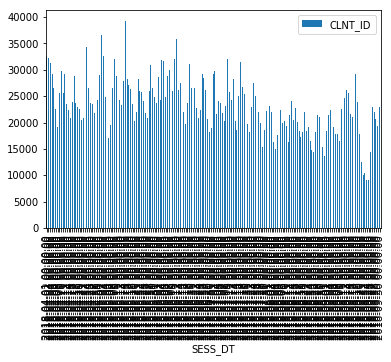

In [19]:
m2[['SESS_DT','CLNT_ID']].groupby(['SESS_DT']).count().plot.bar()

In [ ]:
m2.loc[m2['SESS_DT']=="2018-04-01"]["PD_BUY_CT"]

In [42]:
#일별 구매한 수량 개수 합
m2[['SESS_DT','PD_BUY_CT']].groupby(['SESS_DT']).sum()

,PD_BUY_CT
SESS_DT,
2018-04-01,36787
2018-04-02,38013
2018-04-03,36707
2018-04-04,34411
2018-04-05,35097
2018-04-06,26257
2018-04-07,23045
2018-04-08,30016
2018-04-09,35279


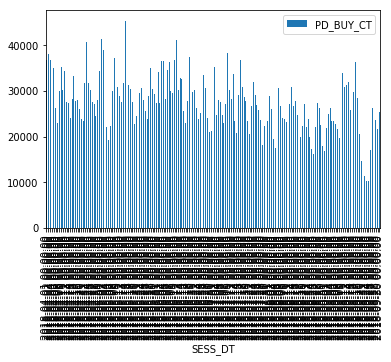

In [43]:
m2[['SESS_DT','PD_BUY_CT']].groupby(['SESS_DT']).sum().plot.bar()

In [51]:
m2['SESS_month'] = pd.DatetimeIndex(m2['SESS_DT']).month

In [52]:
#월별 클라이언트 아이디 개수
m2[['SESS_month','CLNT_ID']].groupby(['SESS_month']).count()

,CLNT_ID
SESS_month,
4,765219
5,804454
6,783704
7,730510
8,593667
9,592775


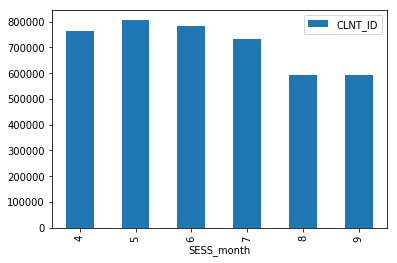

In [53]:
m2[['SESS_month','CLNT_ID']].groupby(['SESS_month']).count().plot.bar()

In [54]:
#월별 구매한 수량 개수 합
m2[['SESS_month','PD_BUY_CT']].groupby(['SESS_month']).sum()

,PD_BUY_CT
SESS_month,
4,906529
5,928696
6,913503
7,849541
8,722896
9,702578


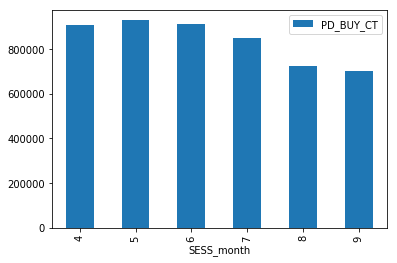

In [55]:
m2[['SESS_month','PD_BUY_CT']].groupby(['SESS_month']).sum().plot.bar()

In [59]:
#월별 구매한 매출
m2[['SESS_month','PD_BUY_price']].groupby(['SESS_month']).sum()

,PD_BUY_price
SESS_month,
4,40463251127
5,41337954046
6,41120306020
7,37111721940
8,33600747760
9,36971503520


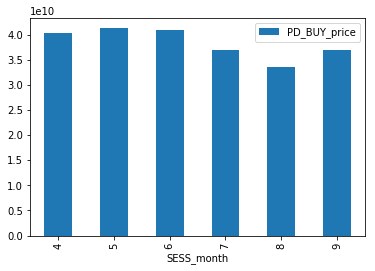

In [60]:
m2[['SESS_month','PD_BUY_price']].groupby(['SESS_month']).sum().plot.bar()

In [44]:
#지역별 클라이언트 아이디 개수
m2[['ZON_NM','CLNT_ID']].groupby(['ZON_NM']).count()

,CLNT_ID
ZON_NM,
Busan,466105
Chungcheongbuk-do,75058
Chungcheongnam-do,127647
Daegu,183603
Daejeon,96317
Gangwon-do,69469
Gwangju,115095
Gyeonggi-do,741970
Gyeongsangbuk-do,149280


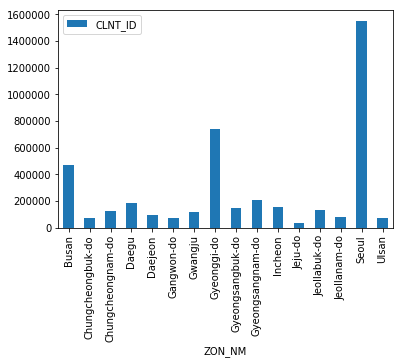

In [45]:
m2[['ZON_NM','CLNT_ID']].groupby(['ZON_NM']).count().plot.bar()

In [46]:
m2[['ZON_NM','PD_BUY_CT']].groupby(['ZON_NM']).sum()

,PD_BUY_CT
ZON_NM,
Busan,546825
Chungcheongbuk-do,85860
Chungcheongnam-do,147259
Daegu,216689
Daejeon,112569
Gangwon-do,79173
Gwangju,132494
Gyeonggi-do,886399
Gyeongsangbuk-do,176428


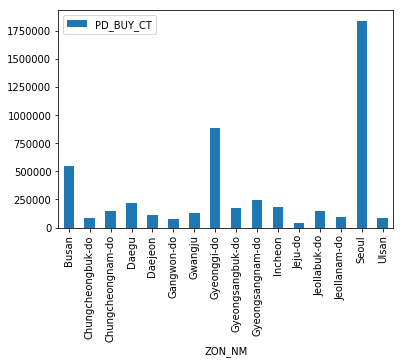

In [47]:
m2[['ZON_NM','PD_BUY_CT']].groupby(['ZON_NM']).sum().plot.bar()

In [61]:
#월별 구매한 매출
m2[['ZON_NM','PD_BUY_price']].groupby(['ZON_NM']).sum()

,PD_BUY_price
ZON_NM,
Busan,26092665925
Chungcheongbuk-do,3676680506
Chungcheongnam-do,6184918443
Daegu,9398247953
Daejeon,4854446121
Gangwon-do,3476795959
Gwangju,5779836667
Gyeonggi-do,39356217345
Gyeongsangbuk-do,7284254764


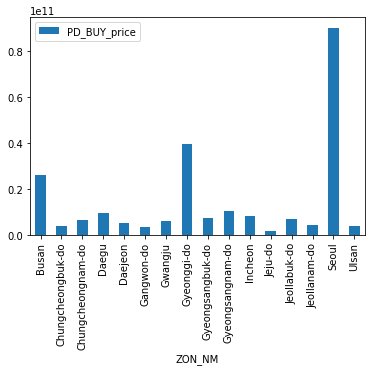

In [63]:
m2[['ZON_NM','PD_BUY_price']].groupby(['ZON_NM']).sum().plot.bar()

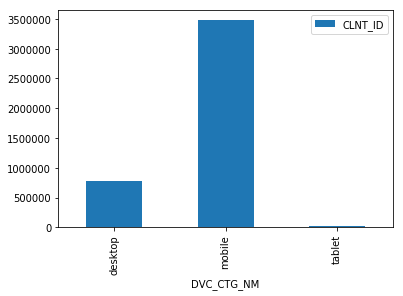

In [48]:
#기기당 아이디 개수
m2[['DVC_CTG_NM','CLNT_ID']].groupby(['DVC_CTG_NM']).count().plot.bar()

In [ ]:
dropidx=product.loc[product['HITS_SEQ']==1].index
new_product=product.drop(dropidx)

In [53]:
m3 = pd.merge(new_product,session,on=['CLNT_ID','SESS_ID'],how='left')

In [54]:
m3.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,4139680,07605037,12,642112,바비브라운,39000,1,1.0,2018-05-26,21.0,902.0,desktop,Seoul,Seoul
1,4140076,10189797,13,570603,데상트,39000,2,172.0,2018-04-13,18.0,113.0,mobile,Gyeonggi-do,Icheon-si
2,4142395,06158159,85,179538,아베다,39000,1,1.0,2018-06-19,107.0,6524.0,desktop,Seoul,Seoul
3,4144914,07935714,12,554336,아디다스 키즈,39000,1,24.0,2018-05-21,13.0,107.0,mobile,Seoul,Seoul
4,4144917,06406509,78,190306,데코르테,39000,5,2.0,2018-06-15,95.0,1367.0,mobile,Gyeonggi-do,Suwon-si


In [55]:
m3.shape

(5019730, 14)

In [56]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5019730 entries, 0 to 5019729
Data columns (total 14 columns):
CLNT_ID            object
SESS_ID            object
HITS_SEQ           int64
PD_C               int64
PD_BRA_NM          object
PD_BUY_AM          int64
PD_BUY_CT          int64
SESS_SEQ           float64
SESS_DT            datetime64[ns]
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V      float64
DVC_CTG_NM         object
ZON_NM             object
CITY_NM            object
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 574.5+ MB


In [57]:
m3.isna().sum()

CLNT_ID                 0
SESS_ID                 0
HITS_SEQ                0
PD_C                    0
PD_BRA_NM               0
PD_BUY_AM               0
PD_BUY_CT               0
SESS_SEQ           753811
SESS_DT            753811
TOT_PAG_VIEW_CT    753811
TOT_SESS_HR_V      768407
DVC_CTG_NM         753811
ZON_NM             753811
CITY_NM            753811
dtype: int64

In [58]:
m3.loc[(m3['TOT_PAG_VIEW_CT'] == 1.0) ]

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
8,4148129,03942102,2,755148,어반디케이,39000,1,3.0,2018-07-25,1.0,NaN,mobile,Seoul,Seoul
249,5120823,00536203,2,19166,나무,39000,1,12.0,2018-09-21,1.0,NaN,desktop,Seoul,Seoul
1354,4729384,00617816,2,40647,다니엘에스떼,39000,1,2.0,2018-09-20,1.0,NaN,desktop,Gyeongsangbuk-do,Gunwi-gun
1389,2941375,09520228,2,816627,고려은단,39900,1,5.0,2018-04-24,1.0,NaN,mobile,Gyeonggi-do,Hanam-si
1410,3100175,10917202,2,464238,탑텐,39900,1,10.0,2018-04-01,1.0,NaN,mobile,Seoul,Seoul
1472,3447350,03617853,2,344414,클라비스,39900,1,2.0,2018-07-31,1.0,NaN,mobile,Gyeonggi-do,Yangju-si
1556,1391274,05391480,2,302705,크록스,39800,1,5.0,2018-07-02,1.0,NaN,mobile,Daejeon,Daejeon
1622,2125506,10514155,2,469549,지오다노,39800,1,14.0,2018-04-08,1.0,NaN,mobile,Ulsan,Ulsan
2449,4227380,08344411,2,323559,지오투,39000,1,360.0,2018-05-14,1.0,4.0,mobile,Gyeongsangbuk-do,Pohang-si
2528,2927068,04771660,2,699350,닥터소이지,39800,1,33.0,2018-07-12,1.0,NaN,mobile,Seoul,Seoul


In [67]:
m3.loc[(m3['TOT_PAG_VIEW_CT'] == 1.0) & (m3['TOT_SESS_HR_V'].isna())]['HITS_SEQ'].quantile([0,.25,.5,.75,1])

0.00      2.0
0.25      2.0
0.50      2.0
0.75      2.0
1.00    177.0
Name: HITS_SEQ, dtype: float64

In [72]:
m3.loc[(m3['TOT_PAG_VIEW_CT'] == 1.0) & (m3['TOT_SESS_HR_V'].isna())]['HITS_SEQ'].value_counts()

2      14471
3         36
177        5
4          2
Name: HITS_SEQ, dtype: int64

In [60]:
m3[m3['TOT_PAG_VIEW_CT']==1]['CLNT_ID'].unique().size

8390